<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/master/datathon-nyc/stonewall_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture

!sudo apt-get install libsnappy-dev
!pip3 install fastparquet pyarrow dask python-snappy

In [2]:
!ls

sample_data


In [0]:
%%capture

!curl -L "https://ruebot.net/stone-wall-text.tar.gz" > stone-wall-text.tar.gz


In [0]:
!tar -xzf stone-wall-text.tar.gz

In [5]:
!ls

sample_data  stone-wall-text  stone-wall-text.tar.gz


In [0]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from fastparquet import ParquetFile
import snappy 

In [0]:
parquet = pq.read_table("stone-wall-text")

In [8]:
df = parquet.to_pandas()
df

,crawl_date,content,url,tokenized_content,tokens,tokenized_content_filtered,filted_tokens
0,20190618,Stonewall 50 | KYW Skip to main content Listen...,https://kywnewsradio.radio.com/categories/ston...,"[stonewall, 50, |, kyw, skip, to, main, conten...",1790,"[stonewall, 50, |, kyw, skip, main, content, l...",1411
1,20190618,"Free Driving Directions, Traffic Reports & GPS...",https://embed.waze.com/iframe?zoom=13&lat=39.9...,"[free, driving, directions,, traffic, reports,...",11,"[free, driving, directions,, traffic, reports,...",10
2,20190618,KYW-NEWSRADIO-1060 on Radio.com: Listen to Fre...,https://player.radio.com/listen/station/kyw-ne...,"[kyw-newsradio-1060, on, radio.com:, listen, t...",13,"[kyw-newsradio-1060, radio.com:, listen, free,...",11
3,20190618,ns,https://www.googletagmanager.com/ns.html?id=GT...,[ns],1,[ns],1
4,20190618,"RADIO.COM: Listen to Free Radio | Music, Sport...",https://www.radio.com/,"[radio.com:, listen, to, free, radio, |, music...",600,"[radio.com:, listen, free, radio, |, music,, s...",468
...,...,...,...,...,...,...,...
630717,20190627,Request unsuccessful. Incapsula incident ID: 9...,https://www.leslielohman.org/project/being-see...,"[request, unsuccessful., incapsula, incident, ...",6,"[request, unsuccessful., incapsula, incident, ...",6
630718,20190627,Request unsuccessful. Incapsula incident ID: 9...,https://www.leslielohman.org/project/being-see...,"[request, unsuccessful., incapsula, incident, ...",6,"[request, unsuccessful., incapsula, incident, ...",6
630719,20190708,,https://3744510.fls.doubleclick.net/activityi;...,[],1,[],1
630720,20190708,,https://3744510.fls.doubleclick.net/activityi;...,[],1,[],1


### Basic word count statistics with Pandas!

Now we can use the power of Pandas to find some basic statistical data!

Notice how the Pandas method looks a little cleaner, and is a little bit faster?

#### Mean

In [9]:
df['tokens'].mean()

712.4620450848392

#### Standard deviation

In [10]:
df['tokens'].std()

1842.3269025005388

#### Max

In [11]:
df['tokens'].max()

146526

#### Min

In [12]:
df['tokens'].min()

1

### Pages with the most words

Let's create a bar chart that shows the pages with the most words. Here we can see the power of Pandas at work, in terms of both analysis and visualization.

First, let's show the query to get the data for our chart.




In [0]:
word_count_df = df[['url', 'tokens']].sort_values(by='tokens', ascending=False).head(25)

Next, let's create a bar chart of this.

Text(0.5, 0, 'Page')

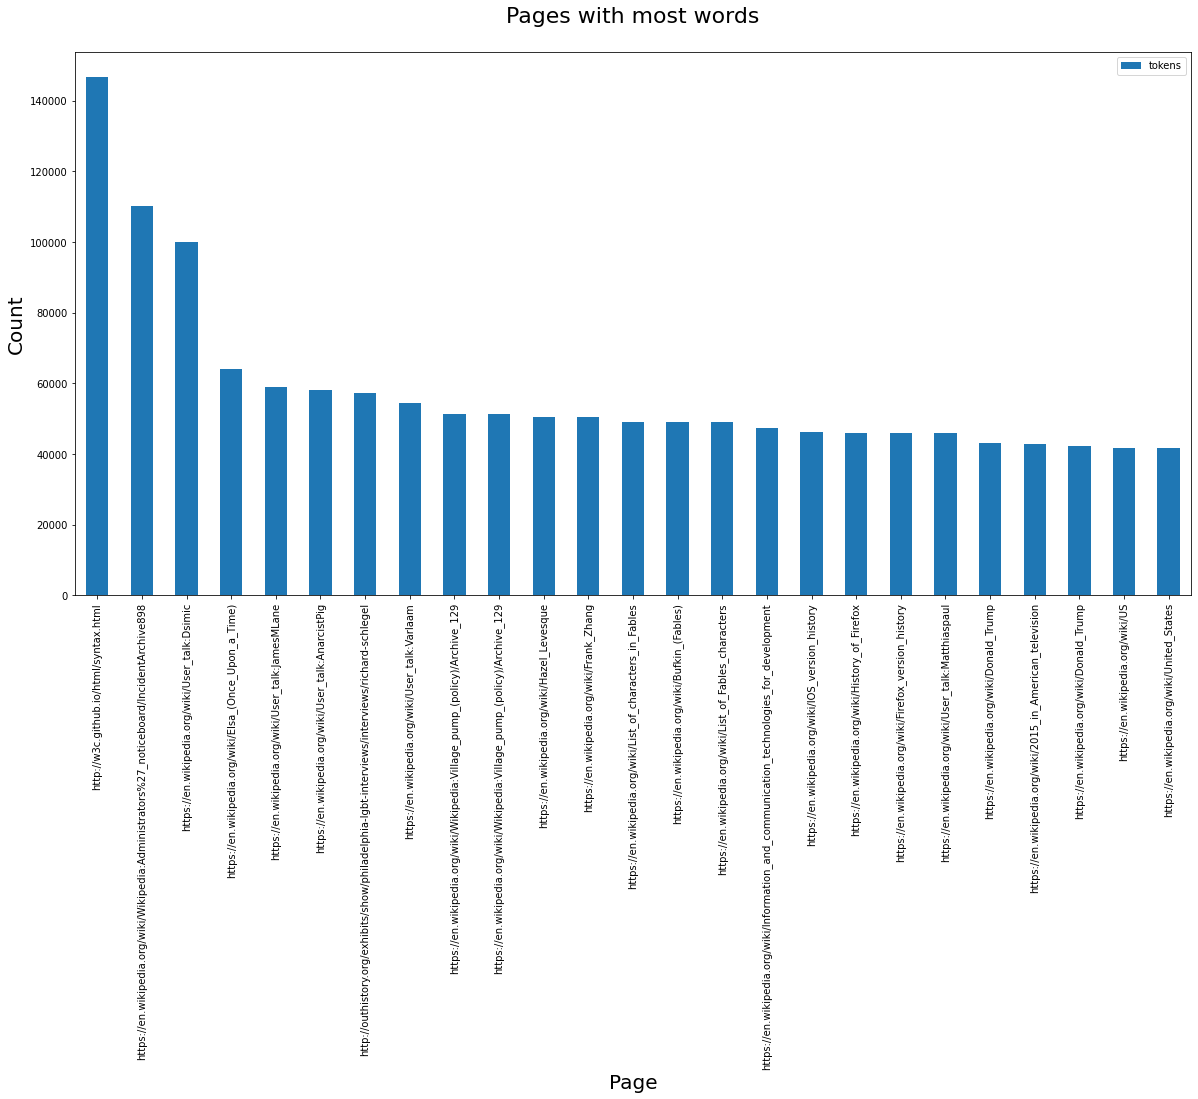

In [14]:
word_count_chart = word_count_df.plot(kind='bar', x='url', figsize=(20,10))
word_count_chart.set_title('Pages with most words\n', fontsize=22)
word_count_chart.set_ylabel('Count', fontsize=20)
word_count_chart.set_xlabel('Page', fontsize=20)

## How about NER on the two pages with the most tokens?

[Named-Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition), or NER, is an exciting field of natural language processing that lets us extract "entities" out of text. This might be the names of people, locations, or organizations. 

To do this, we first need to find the pages that have the most tokens.

In [0]:
pd.set_option('display.max_colwidth', -1)

In [30]:
word_count_max = df[['url', 'tokens', "content"]].sort_values(by='tokens', ascending=False).sample()
word_count_max['url']

166760    https://mobile.twitter.com/search?q=%23stonewall50&prev_cursor=thGAVUV0VFVBagwL3J54jG4R8WgMCgrYTn-eEfEhjIBQQ9VDthRbvUAAAAAAAAFXwAAAAHAAAAVqCoAAQKSRCABSEDMCQUAJkjGAAQFBBAACBA64AABCAAQIAAAGBABAAAAAgioVCAREQCYhgggYCJGoBCE4AACAEAFgIrDEAAQAgCIADBwgAEMAgAAUAQkiBoAIQIAHRIYQAAIAACEgDAFAICGCmSAGAEQAAAEQJEwACQAASYEIwgBgAIAigCYCiBAAAGgFAICggsQgATgAgAgEACESZMIRiAgBuBRAwCgSEAYMKQBoABEgAIVIAIAIyJMAByGEQAYWBQEAACAQAUGQA00mEBBFAQAEiIAIEABAABCCAQBCCEBKAFAAASYAAEADgEgAsCAEACRigBAQgYIVAMQABQIkEgEAQgQAAIQAUQEAAgToMAMRwEASCowBAUgCBCoQCBAQCMYBEKAQA4EC0GATQDoJCAABoAKAZAIBABFEBIAEAAIAEACCACACBQADECACAEGASIAAIIQASAiY4QQGJBWggCEAJZwSAADAAwEIABAAAgJlMaAQCAkQFEAJCCEShggAExggAEsMxIEBkDpAABRAQAiKIQJZBACIRCBYIMAADAQADEQDEBWgEoAAkALKAACFACgIAxEAYIAqHEEhMQqUBFANHiECJERAAIAYAUKVBAQ0UEQAAIACmCEiAgAAoIAkAA0EEDwIECgAACBBEBRA6AGIFJLykoYgEhYAACAAkDgIQxE8AEECMIAAASIAAhAgGQAIYIAAEAAMAFkIAAYQEZABAgAABCECKbAFMohAAgAQkBQAABigAAgAQQxgCipggiIgAwIAUATwAIMOEAAqBgAQKIBgAIBAABQSAAENAgGSAgEBCABAAAAAAQiwFAAkAgACGFQATQAOAQAECBQ

Since these are both the same url, let's just stick with one to keep things simple here.

In [31]:
page = word_count_max['content'].astype('unicode').to_string()
page

"166760    Search Twitter - #stonewall50 Log in Sign up Search Refresh Enter a topic, @name, or fullname Tim Cook @tim_cook 34m 50 years ago, a group of people at the Stonewall Inn refused to stay in the shadows, choosing to build something better for those who came after them. I will never forget their courage, and I am proud to stand on their shoulders as we work toward greater equality. #Stonewall50 View details · GLAAD @glaad 39m On #Stonewall50 we reflect on how far we’ve come and the fight ahead. Together we fight for 100% LGBTQ acceptance. pic.twitter.com/G90RHXBgEQ View photo · 🏳️\u200d🌈LGBTPlusProud - Be proud 🏳️\u200d🌈 @LGBTPlusProud 2h 50 years ago today, a raid on the Stonewall Inn sparked the #StonewallRiots. This started the movement that struggled to win the freedom and rights we enjoy today. There is much still to do, but the LGBT+ community owes them a huge debt of gratitude. 🏳️\u200d🌈Thank you🏳️\u200d🌈 #Stonewall50 pic.twitter.com/4bMgh8Kjro View photo · Jeremy Corbyn

### Setup spaCy

We now need to set up [spaCy](https://en.wikipedia.org/wiki/SpaCy), a natural-language processing toolkit. 

After installing it, the command will run NER on the text. Watch how it finds organizations, people, and beyond!

In [0]:
import spacy
from spacy import displacy

import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

nlp.max_length = 1100000

In [32]:
ner = nlp(page)
displacy.render(ner, style='ent', jupyter=True)

### Word Cloud

Word clouds are always fun, right?! They're an interesting way to visualize word frequency, as the more times that a word occurs, the larger it will appear in the word cloud.

Let's setup some dependencies here. We will install the [`word_cloud`](https://github.com/amueller/word_cloud) library, and setup some stop words via `nltk`.

In [0]:
%%capture

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [0]:
words = df.tokenized_content_filtered.values

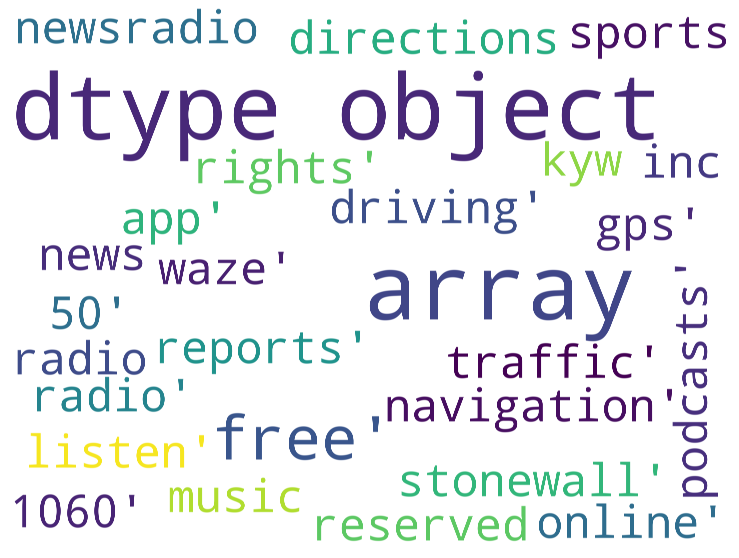

In [22]:
wordcloud = WordCloud(width=2000, height=1500, scale=10, max_font_size=250, max_words=100, background_color="white").generate(str(words))
plt.figure(figsize=[35,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()